<a href="https://colab.research.google.com/github/JaimeMorice/TestGit_Repo/blob/master/KS_Test_Jaime_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Essential libraries***

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

import matplotlib.animation as animation


### ***Loading OrionData with Uncertainties file***

In [3]:
file_id = "15N8E-rmYz9SK6yLT1gLplm19vfIuMJVF"
file_url = f"https://drive.google.com/uc?id={file_id}"

import pandas as pd
orionData = pd.read_csv(file_url)
orionData.head(3) #comment this line if you dont want to see the file structure ;)

,RAJ2000,DEJ2000,2MASS,Lstar,e_Lstar,Teff,e_Teff,Avmag,e_Avmag,Mstar,...,Per,e_Per,Aclass,EWHa,TIC,Tmag,Radii,e_Radii,sini,e_sini
0,85.470177,-2.798562,05415284-0247548,66.082,7.822,5550.3,52.5,0.00,1.71,2.63,...,NaN,NaN,NaN,NaN,NaN,NaN,8.794005,0.546407,NaN,NaN
1,83.783669,-6.563561,05350808-0633488,32.444,2.862,5428.9,48.6,0.00,1.62,2.25,...,NaN,NaN,NaN,NaN,NaN,NaN,6.440529,0.306583,NaN,NaN
2,83.936920,-5.121395,05354486-0507170,3.222,0.093,4047.1,39.8,0.96,0.14,0.57,...,NaN,NaN,C,-5.7,NaN,NaN,3.652186,0.089096,NaN,NaN


###***Example of Toy Models: Samples 1 & 2 as Gaussian Distributions and Sample 3 as an Isotropic Distribution, Followed by a Kolmogorov-Smirnov Test Analysis***

In [4]:
rng = np.random.default_rng() # Generates a random number
sample1 = stats.norm.rvs(loc=45, scale=30, size=1000, random_state=rng) # Toy model (1) of spin inclination using a Mean=45 degrees, Stdev=30 degress
sample2 = stats.norm.rvs(loc=50, scale=15, size=1000, random_state=rng) # Toy model (2) of spin inclination using a Mean=50 degrees, Stdev=15 degrees
sample3 = np.random.uniform(0, 360, size=1000) # Toy model (3) of random distribution of spin inclination between 0 and 360 degrees.
print(stats.ks_2samp(sample1, sample2)) # KS Test between sample 1 and 2
print(stats.ks_2samp(sample1, sample3)) # KS Test between sample 1 and 3

KstestResult(statistic=np.float64(0.227), pvalue=np.float64(5.463699054715322e-23), statistic_location=np.float64(31.157316914078283), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.662), pvalue=np.float64(9.196035759637735e-208), statistic_location=np.float64(97.92173863409748), statistic_sign=np.int8(1))


# **How to interpret the KS test?**
**Based on p-value:**

If p-value is very small (<0.05) → the distributions are significantly different.

If p-value is large (≥0.05), there is not enough evidence to conclude that the distributions are different → they could come from the same distribution.

**Based on Statistic value (D):**

D ≈ 0	→ The distributions are almost identical.

D < 0.1	→ The distributions are very similar.

0.1 ≤ D < 0.3	→ Some moderate differences exist between the distributions.

D ≥ 0.3	→ The distributions are significantly different.

### ***Visual Representation of Toy Models: An Example***

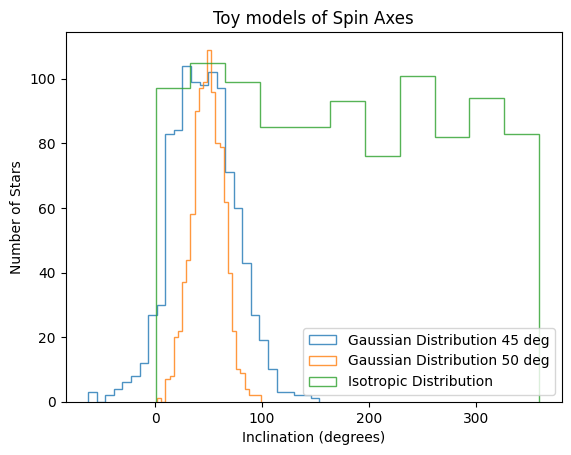

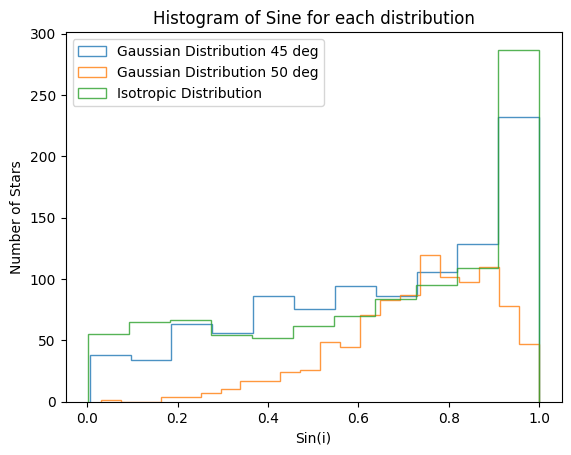

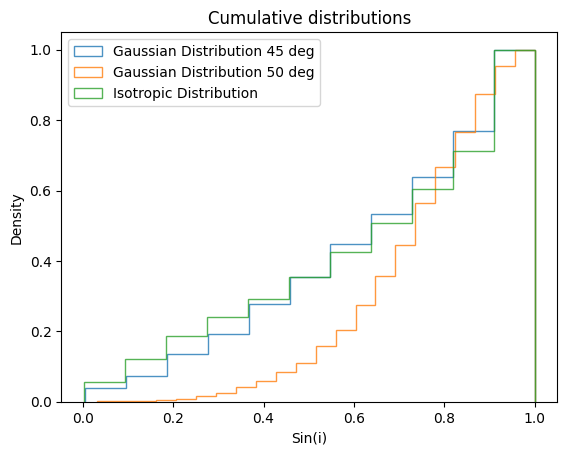

In [5]:
plt.figure()
plt.hist(sample1, bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 45 deg')
plt.hist(sample2, bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 50 deg')
plt.hist(sample3, bins="auto", histtype='step', fill=False, alpha=0.8, label='Isotropic Distribution')
plt.xlabel('Inclination (degrees)')
plt.ylabel('Number of Stars')
plt.legend()
plt.title('Toy models of Spin Axes')
plt.show()

plt.figure()
plt.hist(np.abs(np.sin(sample1*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 45 deg')
plt.hist(np.abs(np.sin(sample2*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 50 deg')
plt.hist(np.abs(np.sin(sample3*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Isotropic Distribution')
plt.xlabel('Sin(i)')
plt.ylabel('Number of Stars')
plt.legend()
plt.title('Histogram of Sine for each distribution')
plt.show()

plt.figure()
plt.hist(np.abs(np.sin(sample1*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 45 deg', cumulative=1, density=True)
plt.hist(np.abs(np.sin(sample2*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Gaussian Distribution 50 deg', cumulative=1, density=True)
plt.hist(np.abs(np.sin(sample3*np.pi/180)), bins="auto", histtype='step', fill=False, alpha=0.8, label='Isotropic Distribution', cumulative=1, density=True)
plt.xlabel('Sin(i)')
plt.ylabel('Density')
plt.legend()
plt.title('Cumulative distributions')
plt.show()

In [ ]:
from google.colab import drive # I believe this and the next line can be removed since we've already loaded the data above. 😉
drive.mount('/content/drive')

Mounted at /content/drive


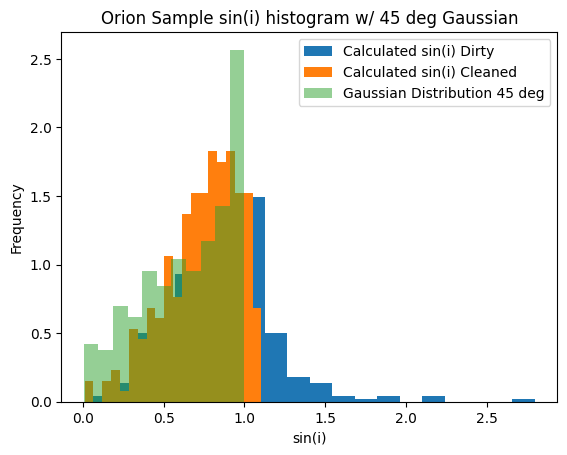

In [6]:
#orionData = pd.read_csv('/content/orionDataW:sin(i).csv') #Now this line is not needed because we have loaded the orionData above ;)

#Filter those sini values less than or equal to 1 within error bars, uncomment the next line and see the structure ;)
orionData['sini'].plot(kind='hist', bins=20, density=True, label = "Calculated sin(i) Dirty")
orion_cleaned = orionData[(orionData['sini'] + orionData['e_sini'] <= 1) | (orionData['sini'] - orionData['e_sini'] <= 1)]
orion_cleaned['sini'].plot(kind='hist', bins=20, density=True, label = "Calculated sin(i) Cleaned")
plt.hist(np.abs(np.sin(sample1*np.pi/180)), bins="auto", density=True, alpha=0.5, label='Gaussian Distribution 45 deg')
plt.title('Orion Sample sin(i) histogram w/ 45 deg Gaussian')
plt.xlabel('sin(i)')
#plt.xlim(0,1) #uncomment this line to set a limit in x axis from 0 to 1
plt.legend()
#stdev for Gaussian is 30.


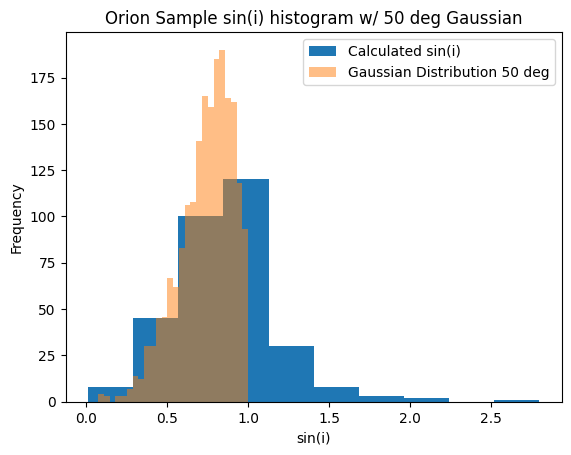

In [6]:
sample3 = stats.norm.rvs(loc=50, scale=15, size=2000, random_state=rng) # Mean=50 degrees, Stdev=15 degrees
orionData['sini'].plot(kind='hist', label = "Calculated sin(i)")
plt.hist(np.abs(np.sin(sample3*np.pi/180)), bins="auto", alpha=0.5, label='Gaussian Distribution 50 deg')
plt.title('Orion Sample sin(i) histogram w/ 50 deg Gaussian')
plt.xlabel('sin(i)')
plt.legend()

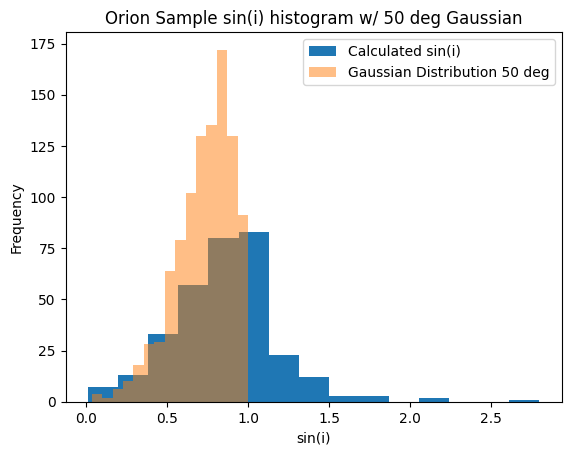

In [7]:
orionData['sini'].plot(kind='hist', label = "Calculated sin(i)", bins = 15)
plt.hist(np.abs(np.sin(sample2*np.pi/180)), bins=15, alpha=0.5, label='Gaussian Distribution 50 deg')
plt.title('Orion Sample sin(i) histogram w/ 50 deg Gaussian')
plt.xlabel('sin(i)')
plt.legend()

In [8]:
#why are the widths of the data different?
OrionMean = np.mean(orionData['sini'])
OrionStdev = np.std(orionData['sini'])
print(OrionMean)
print(OrionStdev)

0.8658805534126082
0.33023680453935106


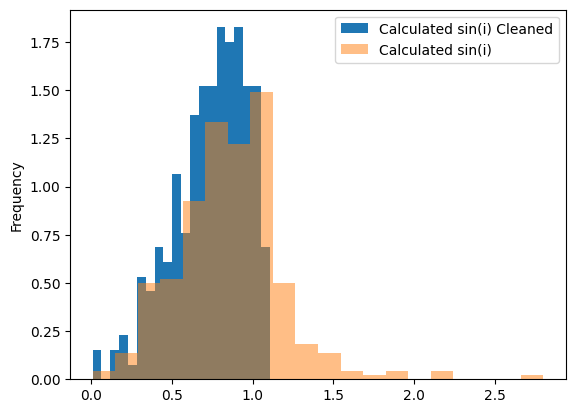

In [9]:
orion_cleaned['sini'].plot(kind='hist', bins=20, density=True, label = "Calculated sin(i) Cleaned")
plt.hist(orionData['sini'], bins = 20, density =True, label = "Calculated sin(i)", alpha = 0.5)
plt.legend()

1857
240


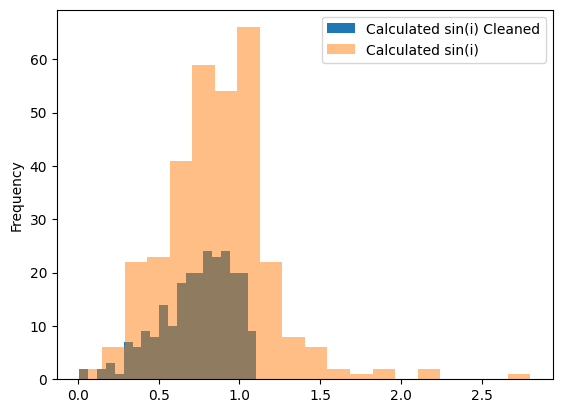

In [10]:
#np.max(orion_cleaned['sini'])
print(len(orionData['sini']))
print(len(orion_cleaned['sini']))
orion_cleaned['sini'].plot(kind='hist', bins=20, label = "Calculated sin(i) Cleaned")
plt.hist(orionData['sini'], bins = 20, label = "Calculated sin(i)", alpha = 0.5)
plt.legend()
#need to revisit // looks like more data is cut out than those with condition: ( sin(i) > 1 )

## **How inclinations are distributed in Orion?**
It would be really interesting to see this distribution in more detail! A great next step could be to create the same plot but with sin(i) as a color map, this could reveal patterns and trends per region in Orion if any 😉

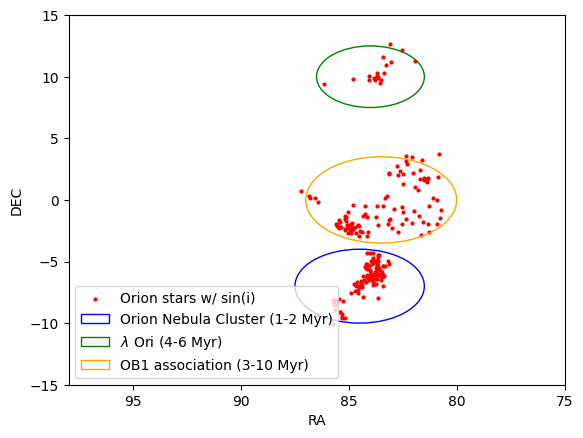

In [11]:
plt.scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], c='red', s=4, label="Orion stars w/ sin(i)")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim(98,75)
plt.ylim(-15,15)

# circles centered in Orion regions by ranges of age
ONC_region = patches.Circle((84.5, -7), 3, edgecolor='blue', facecolor='none', linewidth=1, label="Orion Nebula Cluster (1-2 Myr)")
Lambda_Ori_region = patches.Circle((84, 10), 2.5, edgecolor='green', facecolor='none', linewidth=1, label=r"$\lambda$ Ori (4-6 Myr)")
OB1_region = patches.Circle((83.5, 0), 3.5, edgecolor='orange', facecolor='none', linewidth=1, label="OB1 association (3-10 Myr)")

ax = plt.gca()
ax.add_patch(ONC_region)
ax.add_patch(Lambda_Ori_region)
ax.add_patch(OB1_region)

plt.legend(loc="lower left")
plt.show()

#COOL!
#If plot used, may use red to depict original data set, blue for cleaned. TODO
#Give color bars for sin(i)

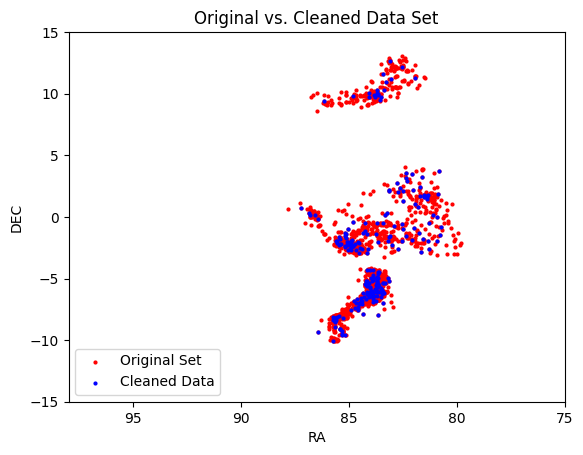

In [12]:
plt.scatter(orionData['RAJ2000'],orionData['DEJ2000'], c='red', s=4, label= "Original Set")
plt.scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], c='blue', s=4, label="Cleaned Data")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim(98,75)
plt.ylim(-15,15)
plt.title("Original vs. Cleaned Data Set")

plt.legend(loc="lower left")
plt.show()


In [13]:
siniCount=0
#drops NAN
for thisSini in orionData['sini'].dropna():
    if (thisSini > 1):
      siniCount = siniCount + 1
   # print(thisSini)

print(siniCount)
print(len(orionData['sini'].dropna()))

102
317


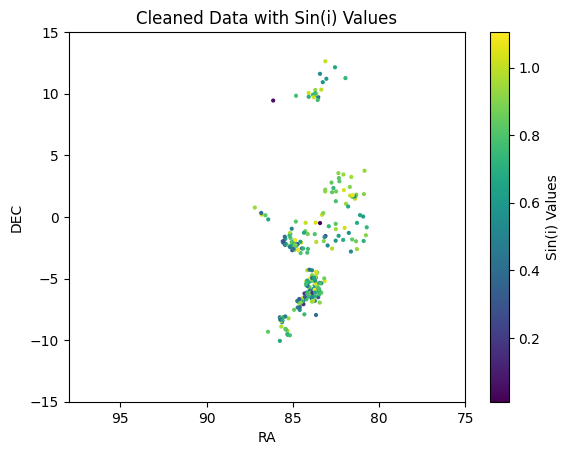

In [14]:
scatter = plt.scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], s=4, label="Cleaned Data", c = orion_cleaned['sini'])
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim(98,75)
plt.ylim(-15,15)
plt.title("Cleaned Data with Sin(i) Values")
plt.colorbar(scatter, label='Sin(i) Values', orientation='vertical')

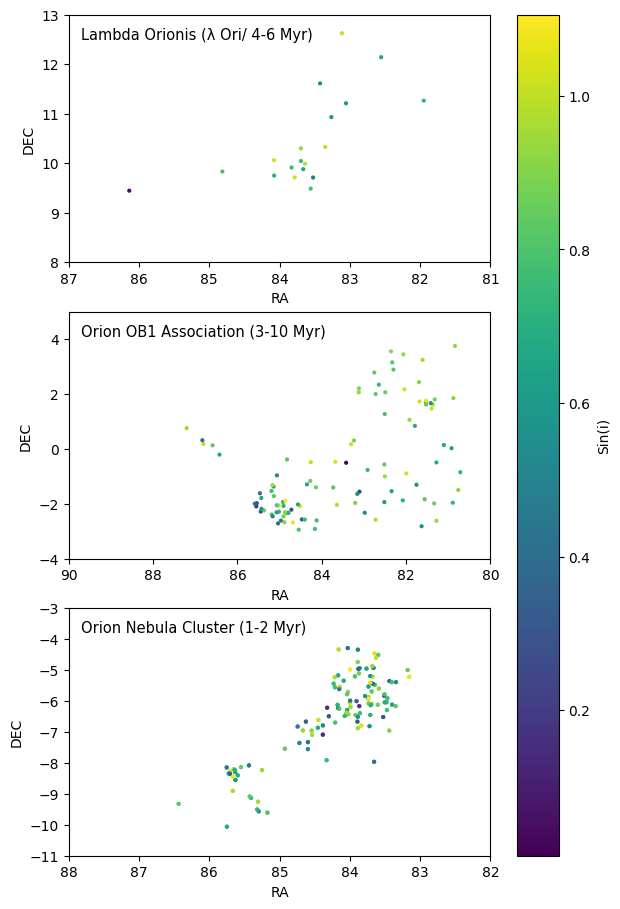

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(6, 9))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

scatter2 = plt.scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], s=4, c = orion_cleaned['sini'])

axes[0].scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], s=4, c = orion_cleaned['sini'])
axes[0].set_xlabel("RA")
axes[0].set_ylabel("DEC")
axes[0].set_xlim(87,81)
axes[0].set_ylim(8,13)
axes[0].text(0.03, 0.95, "Lambda Orionis (λ Ori/ 4-6 Myr)", transform=axes[0].transAxes, ha='left', va='top', fontsize=10.5, color='black')

axes[1].scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], s=4, c = orion_cleaned['sini'])
axes[1].set_xlabel("RA")
axes[1].set_ylabel("DEC")
axes[1].set_xlim(90,80)
axes[1].set_ylim(-4,5)
axes[1].text(0.03, 0.95, "Orion OB1 Association (3-10 Myr)", transform=axes[1].transAxes, ha='left', va='top', fontsize=10.5, color='black')

axes[2].scatter(orion_cleaned['RAJ2000'],orion_cleaned['DEJ2000'], s=4, c = orion_cleaned['sini'])
axes[2].set_xlabel("RA")
axes[2].set_ylabel("DEC")
axes[2].set_xlim(88,82)
axes[2].set_ylim(-11,-3)
axes[2].text(0.03, 0.95, "Orion Nebula Cluster (1-2 Myr)", transform=axes[2].transAxes, ha='left', va='top', fontsize=10.5, color='black')

plt.colorbar(scatter2, ax=axes, label='Sin(i)', orientation='vertical')


Appears to be variety of sin(i) values within each section inside Orion despite difference in age.

# KS Test for simple models and observed data

In [16]:
lambdaOrionis = orion_cleaned[orion_cleaned['RAJ2000'] >= 81]
lambdaOrionis = lambdaOrionis[orion_cleaned['RAJ2000'] <= 87]
lambdaOrionis = lambdaOrionis[orion_cleaned['DEJ2000'] >= 8]
lambdaOrionis = lambdaOrionis[orion_cleaned['DEJ2000'] <= 13]

orionOB1 = orion_cleaned[orion_cleaned['RAJ2000'] >= 80]
orionOB1 = orionOB1[orion_cleaned['RAJ2000'] <= 90]
orionOB1 = orionOB1[orion_cleaned['DEJ2000'] >= -4]
orionOB1 = orionOB1[orion_cleaned['DEJ2000'] <= 4]

nebulaCluster = orion_cleaned[orion_cleaned['RAJ2000'] >= 82]
nebulaCluster = nebulaCluster[orion_cleaned['RAJ2000'] <= 88]
nebulaCluster = nebulaCluster[orion_cleaned['DEJ2000'] >= -11]
nebulaCluster = nebulaCluster[orion_cleaned['DEJ2000'] <= -3]

<ipython-input-16-db89b3cc5c03>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambdaOrionis = lambdaOrionis[orion_cleaned['RAJ2000'] <= 87]
<ipython-input-16-db89b3cc5c03>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambdaOrionis = lambdaOrionis[orion_cleaned['DEJ2000'] >= 8]
<ipython-input-16-db89b3cc5c03>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambdaOrionis = lambdaOrionis[orion_cleaned['DEJ2000'] <= 13]
<ipython-input-16-db89b3cc5c03>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orionOB1 = orionOB1[orion_cleaned['DEJ2000'] <= 4]
<ipython-input-16-db89b3cc5c03>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nebulaCluster = nebulaCluster[orion_cleaned['RAJ2000'] <= 88]
<ipython-input-16-db89b3cc5c03>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nebulaCluster = nebula

P-value: 0.3457312435158833


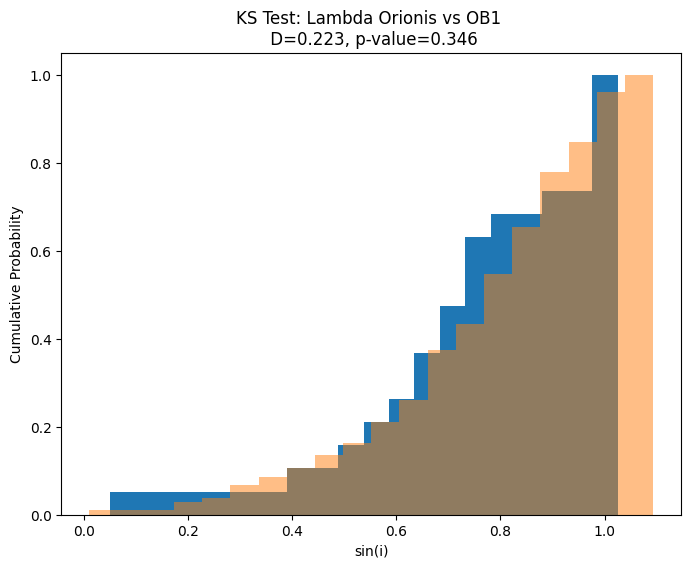

In [18]:
ks_statistic, p_value = stats.ks_2samp(lambdaOrionis['sini'], orionOB1['sini'])
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(lambdaOrionis['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(orionOB1['sini'], bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Lambda Orionis vs OB1 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.16072274533145456


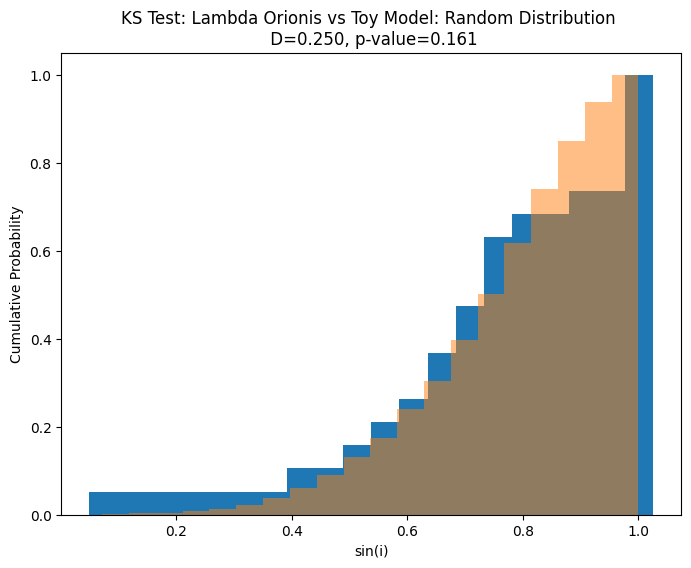

In [17]:
#LAMBDA ORIONIS RANDOM

ks_statistic, p_value = stats.ks_2samp(lambdaOrionis['sini'], np.abs(np.sin(sample3 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(lambdaOrionis['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample3 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Lambda Orionis vs Toy Model: Random Distribution \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()


P-value: 0.31478795025705403


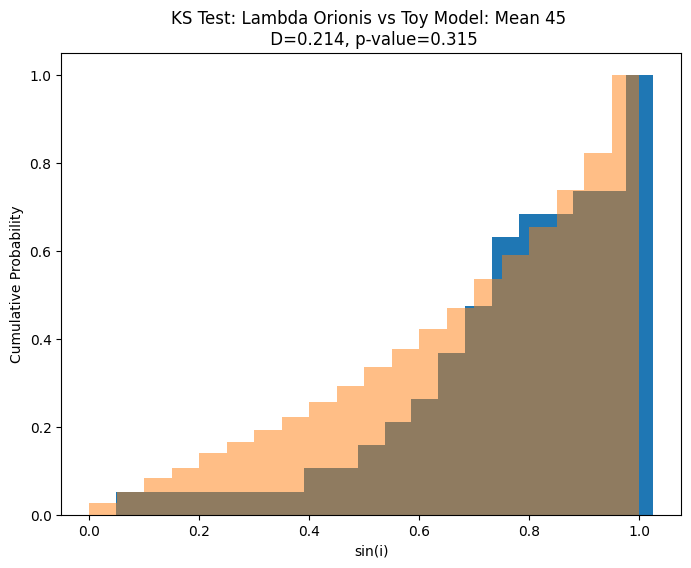

In [18]:
#LAMBDA ORIONIS MEAN 45
ks_statistic, p_value = stats.ks_2samp(lambdaOrionis['sini'], np.abs(np.sin(sample1 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(lambdaOrionis['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample1 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Lambda Orionis vs Toy Model: Mean 45 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.18251692859363877


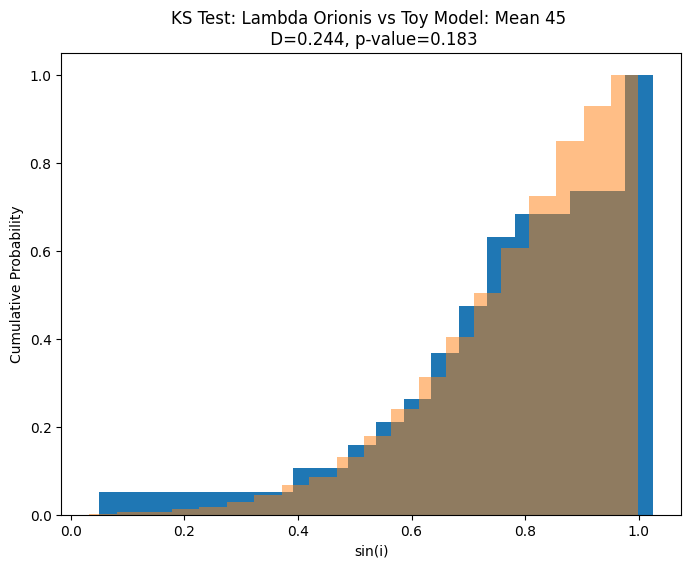

In [19]:
#LAMBDA ORIONIS MEAN 50
ks_statistic, p_value = stats.ks_2samp(lambdaOrionis['sini'], np.abs(np.sin(sample2 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(lambdaOrionis['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample2 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Lambda Orionis vs Toy Model: Mean 45 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.003970297589684064


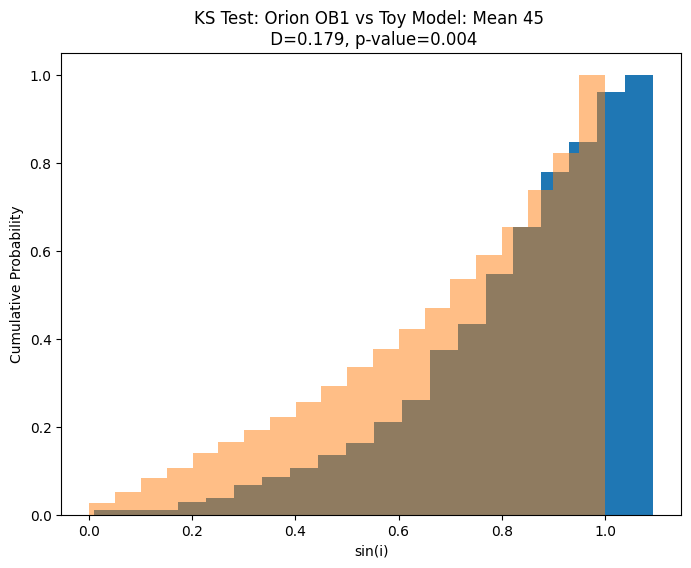

In [20]:
ks_statistic, p_value = stats.ks_2samp(orionOB1['sini'], np.abs(np.sin(sample1 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(orionOB1['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample1 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion OB1 vs Toy Model: Mean 45 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.008800662849172048


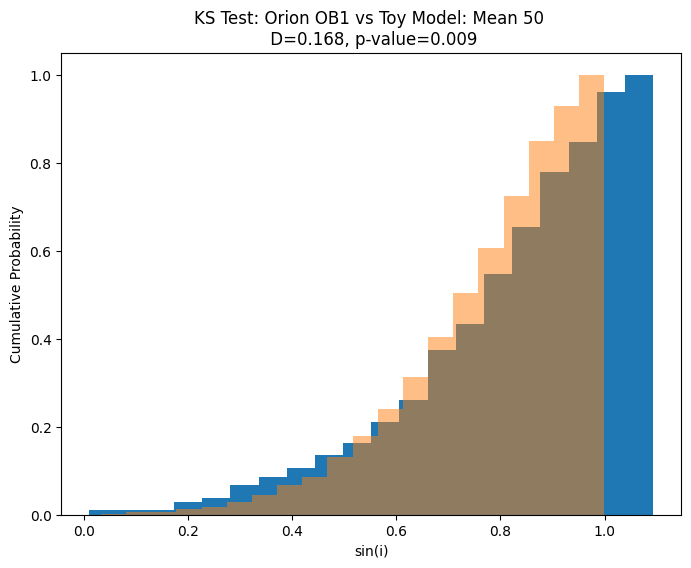

In [21]:
ks_statistic, p_value = stats.ks_2samp(orionOB1['sini'], np.abs(np.sin(sample2 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(orionOB1['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample2 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion OB1 vs Toy Model: Mean 50 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.020789032339377376


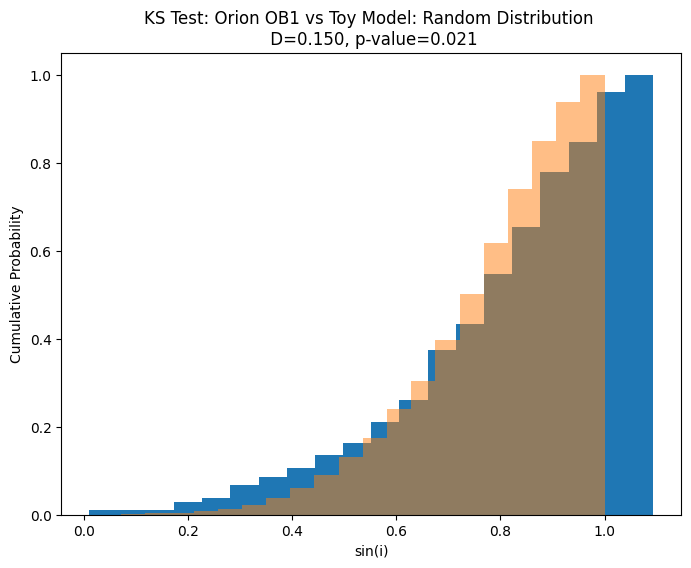

In [22]:
ks_statistic, p_value = stats.ks_2samp(orionOB1['sini'], np.abs(np.sin(sample3 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(orionOB1['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample3 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion OB1 vs Toy Model: Random Distribution \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.020702989480420368


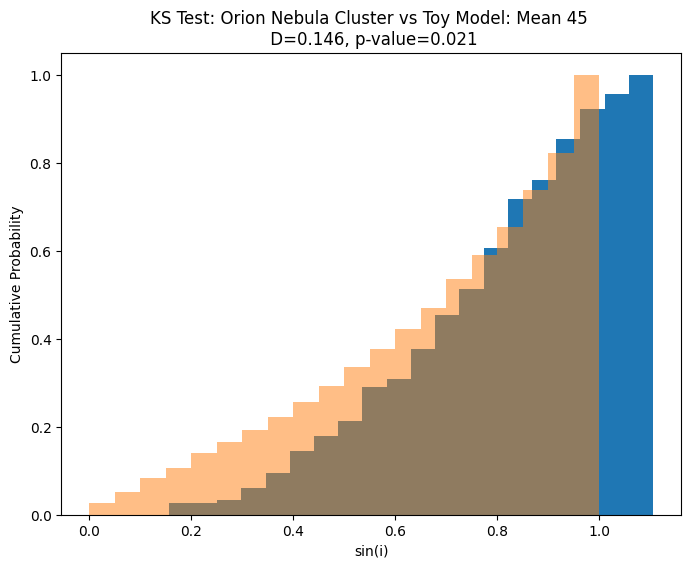

In [23]:
ks_statistic, p_value = stats.ks_2samp(nebulaCluster['sini'], np.abs(np.sin(sample1 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(nebulaCluster['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample1 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Nebula Cluster vs Toy Model: Mean 45 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.06419198357009517


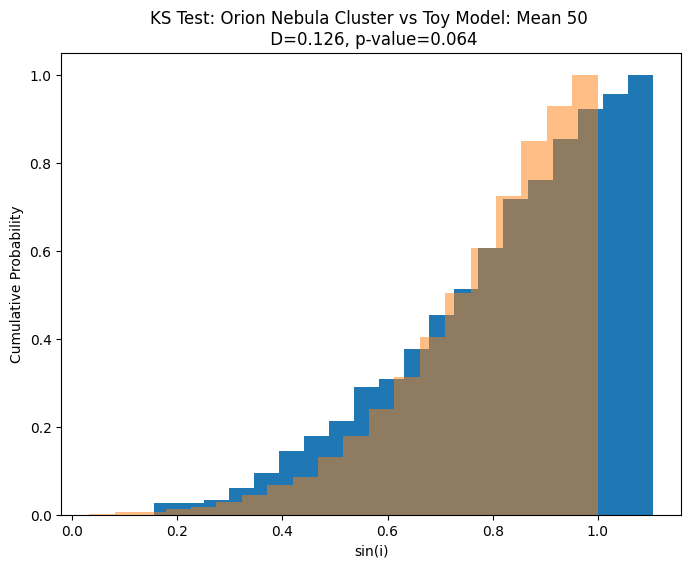

In [24]:
ks_statistic, p_value = stats.ks_2samp(nebulaCluster['sini'], np.abs(np.sin(sample2 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(nebulaCluster['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample2 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Nebula Cluster vs Toy Model: Mean 50 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.05145429478110816


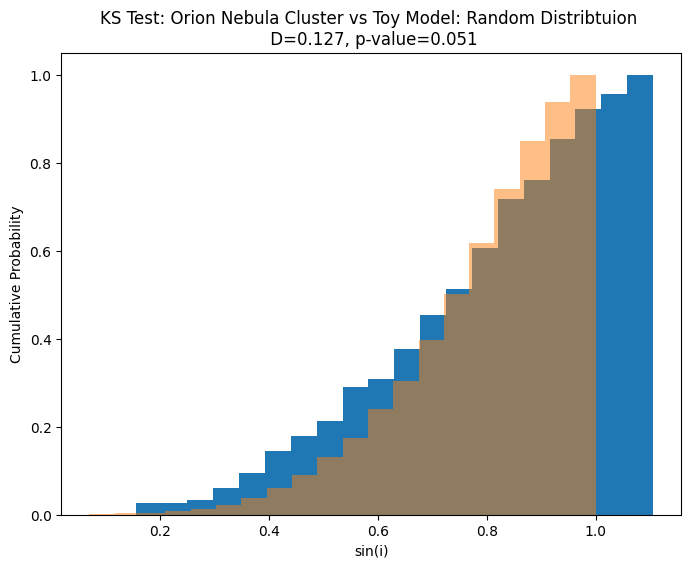

In [25]:
ks_statistic, p_value = stats.ks_2samp(nebulaCluster['sini'], np.abs(np.sin(sample3 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(nebulaCluster['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample3 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Nebula Cluster vs Toy Model: Random Distribtuion \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

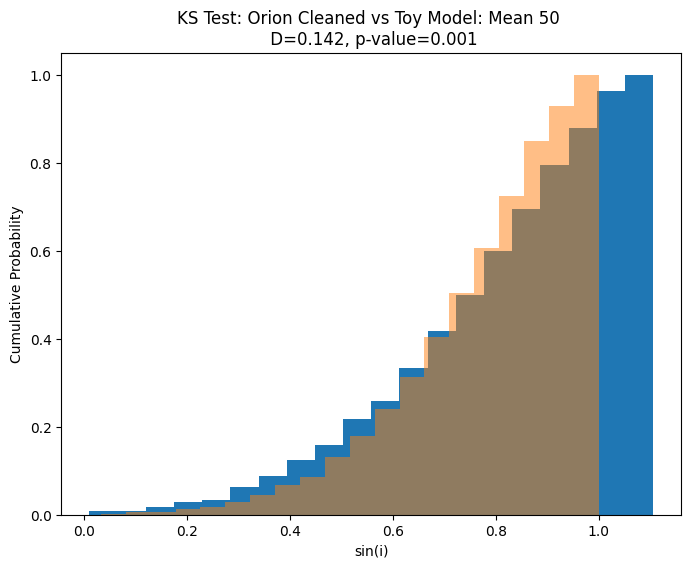

In [26]:
# KS Test between orion_cleaned and toy model (45 degrees)
ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], np.abs(np.sin(sample2 * np.pi / 180)))
#print(f"KS Test Statistic: {ks_statistic}")
#print(f"P-value: {p_value}")

# Plot the cumulative distributions
plt.figure(figsize=(8, 6))

# Empirical cumulative distribution function for orion_cleaned
plt.hist(orion_cleaned['sini'], bins=20, density=True, cumulative=True, alpha=1)

# Empirical cumulative distribution function for sample1
plt.hist(np.abs(np.sin(sample2 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Cleaned vs Toy Model: Mean 50 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()
# KS Test, evaluate for Orion Cleaned Data vs Toy Model

P-value: 0.0003861032265576528


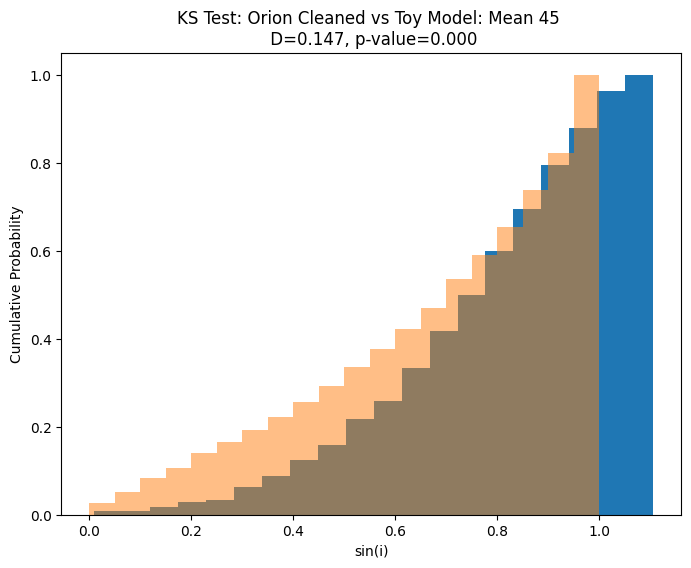

In [27]:
ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], np.abs(np.sin(sample1 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(orion_cleaned['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample1 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Cleaned vs Toy Model: Mean 45 \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

P-value: 0.0015838199886300162


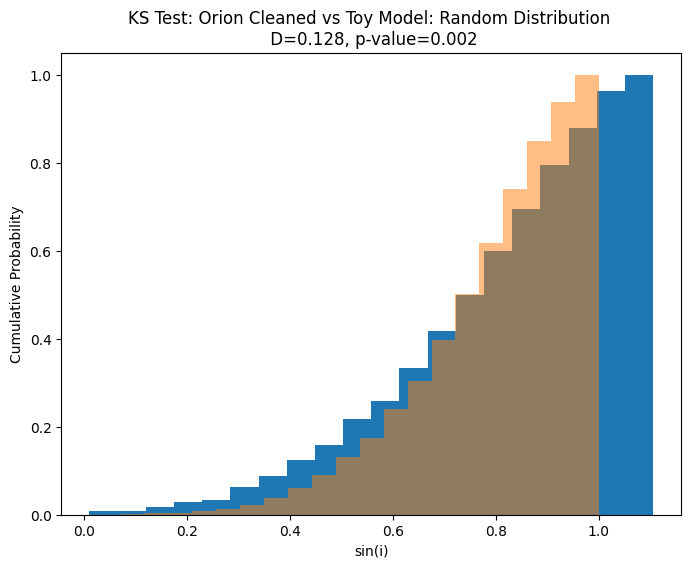

In [28]:
# KS Test between orion_cleaned and toy model (45 degrees)
ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], np.abs(np.sin(sample3 * np.pi / 180)))
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))

plt.hist(orion_cleaned['sini'], bins=20, density=True, cumulative=True, alpha=1)

plt.hist(np.abs(np.sin(sample3 * np.pi / 180)), bins=20, density=True, cumulative=True, alpha=0.5)

plt.xlabel('sin(i)')
plt.ylabel('Cumulative Probability')
plt.title(f"KS Test: Orion Cleaned vs Toy Model: Random Distribution \n D={ks_statistic:.3f}, p-value={p_value:.3f}")
#plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#Different statistical test considering uncertainties
#

NameError: name 'orionData' is not defined

In [29]:
#Printing all p-vals w/ Gaussian.

pVals = []

for i in range(0,91,5):

  mu = np.sin(np.radians(i))
  sigma = 15

  x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
  #y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2) #may not want to compare with PDF directly. Not an empirical
  #dataset. A random (toy) sample is.
  gaussianSamp = stats.norm.rvs(loc=mu, scale=sigma, size=len(orion_cleaned['sini']))

  ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], gaussianSamp)

  pVals.append(p_value)

print(pVals)




[np.float64(4.1287548528668e-28), np.float64(7.311711389415559e-25), np.float64(4.506947230357404e-30), np.float64(4.39883847694239e-31), np.float64(1.418134257827976e-29), np.float64(4.1287548528668e-28), np.float64(1.418134257827976e-29), np.float64(1.2420670849040957e-27), np.float64(4.411973246575925e-29), np.float64(1.2420670849040957e-27), np.float64(4.411973246575925e-29), np.float64(4.1287548528668e-28), np.float64(1.416117299156015e-30), np.float64(1.418134257827976e-29), np.float64(2.501990069020068e-35), np.float64(1.2420670849040957e-27), np.float64(1.2420670849040957e-27), np.float64(1.3572426173788653e-28), np.float64(1.3572426173788653e-28)]


In [7]:
orion_cleaned = orionData[(orionData['sini']  <= 1)]

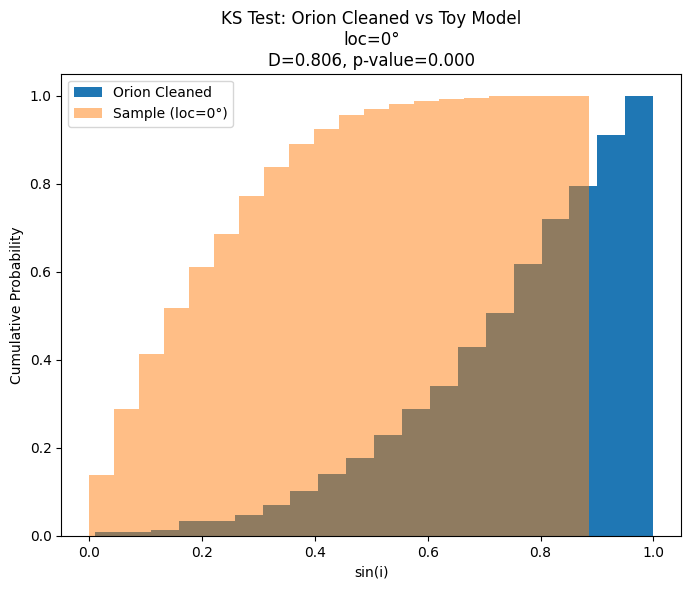

In [15]:
from IPython.display import HTML  # Needed for ColabCode

rng = np.random.default_rng(42)

#loc=i range (0 to 90)
angles = np.arange(0, 100, 10)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Make update function
def update(frame):
    i = angles[frame]  # Current loc value for sample1
    sample1 = stats.norm.rvs(loc=i, scale=15, size=1000, random_state=rng)  # Generate new sample
    sample_sini = np.abs(np.sin(sample1 * np.pi / 180))  # Convert to sin(i)

    # KS Test
    ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], sample_sini)

    # Clear previous plots
    ax.cla()

    # Plot cumulative histograms
    ax.hist(orion_cleaned['sini'], bins=20, density=True, cumulative=True, alpha=1, label="Orion Cleaned")
    ax.hist(sample_sini, bins=20, density=True, cumulative=True, alpha=0.5, label=f"Sample (loc={i}°)")

    # Update title with current KS test results
    ax.set_title(f"KS Test: Orion Cleaned vs Toy Model\nloc={i}°\nD={ks_statistic:.3f}, p-value={p_value:.3f}")

    # Labels and legend
    ax.set_xlabel('sin(i)')
    ax.set_ylabel('Cumulative Probability')
    ax.legend()

# Create animation (10 frames, one per inclination update)
ani = animation.FuncAnimation(fig, update, frames=len(angles), interval=1000, repeat=True)

HTML(ani.to_jshtml()) #Thank you to Python animation package!

# Realistic model (Cone model) we'll see this next time!

IndexError: index 9 is out of bounds for axis 0 with size 9

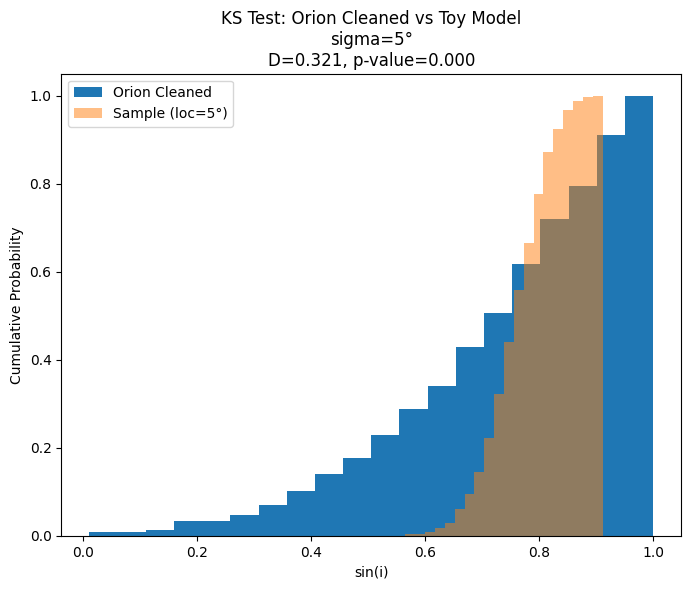

In [14]:
from IPython.display import HTML  # Needed for ColabCode

rng = np.random.default_rng(42)

#loc=i range (0 to 90)
sigma = np.arange(5, 50, 5)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

sigma = np.arange(5, 50, 5)

# Make update function
def update(frame):
    i = sigma[frame]  # Current loc value for sample1
    sample1 = stats.norm.rvs(loc=50, scale=i, size=1000, random_state=rng)  # Generate new sample
    sample_sini = np.abs(np.sin(sample1 * np.pi / 180))  # Convert to sin(i)

    # KS Test
    ks_statistic, p_value = stats.ks_2samp(orion_cleaned['sini'], sample_sini)

    # Clear previous plots
    ax.cla()

    # Plot cumulative histograms
    ax.hist(orion_cleaned['sini'], bins=20, density=True, cumulative=True, alpha=1, label="Orion Cleaned")
    ax.hist(sample_sini, bins=20, density=True, cumulative=True, alpha=0.5, label=f"Sample (loc={i}°)")

    # Update title with current KS test results
    ax.set_title(f"KS Test: Orion Cleaned vs Toy Model\nsigma={i}°\nD={ks_statistic:.3f}, p-value={p_value:.3f}")

    # Labels and legend
    ax.set_xlabel('sin(i)')
    ax.set_ylabel('Cumulative Probability')
    ax.legend()

# Create animation (10 frames, one per inclination update)
ani = animation.FuncAnimation(fig, update, frames=len(angles), interval=1000, repeat=True)

HTML(ani.to_jshtml()) #Thank you to Python animation package!